In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("compressed_data.csv")

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

#Checking missing values

In [6]:
print(df.isnull().sum())

id                                   0
NAME                                56
host id                              0
host_identity_verified              73
host name                           19
neighbourhood group                 27
neighbourhood                       16
lat                                  8
long                                 8
country                             50
country code                        80
instant_bookable                    80
cancellation_policy                 51
room type                            1
Construction year                  136
price                               12
service fee                         16
minimum nights                      85
number of reviews                    7
last review                        164
reviews per month                  150
review rate number                  94
calculated host listings count      16
availability 365                   149
house_rules                        885
license                  

# Handling missing values

In [7]:
df['last review'] = pd.to_datetime(df['last review'], errors = 'coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695 entries, 0 to 2694
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              2695 non-null   int64         
 1   NAME                            2639 non-null   object        
 2   host id                         2695 non-null   int64         
 3   host_identity_verified          2622 non-null   object        
 4   host name                       2676 non-null   object        
 5   neighbourhood group             2668 non-null   object        
 6   neighbourhood                   2679 non-null   object        
 7   lat                             2687 non-null   float64       
 8   long                            2687 non-null   float64       
 9   country                         2645 non-null   object        
 10  country code                    2615 non-null   object        
 11  inst

In [9]:
df.fillna({'reviews per month': 0, 'last review' : df['last review'].min()}, inplace = True)

In [10]:
df.dropna(subset = ['NAME','host name'], inplace = True)

In [11]:
print(df.isnull().sum())

id                                   0
NAME                                 0
host id                              0
host_identity_verified              63
host name                            0
neighbourhood group                 24
neighbourhood                       16
lat                                  8
long                                 8
country                             44
country code                        71
instant_bookable                    71
cancellation_policy                 45
room type                            1
Construction year                  123
price                               12
service fee                         16
minimum nights                      79
number of reviews                    6
last review                          0
reviews per month                    0
review rate number                  82
calculated host listings count      15
availability 365                   121
house_rules                        869
license                  

In [12]:
df = df.drop(columns=["license","house_rule"],errors='ignore')

In [13]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."


In [14]:
#Remove dollar signs and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]','',regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_796/2401873673.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipykernel_796/2401873673.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace('[\$,]','',regex=True).astype(float)


In [15]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."


#Remove duplicates

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2626 entries, 0 to 2694
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              2626 non-null   int64         
 1   NAME                            2626 non-null   object        
 2   host id                         2626 non-null   int64         
 3   host_identity_verified          2563 non-null   object        
 4   host name                       2626 non-null   object        
 5   neighbourhood group             2602 non-null   object        
 6   neighbourhood                   2610 non-null   object        
 7   lat                             2618 non-null   float64       
 8   long                            2618 non-null   float64       
 9   country                         2582 non-null   object        
 10  country code                    2555 non-null   object        
 11  instant_b

Descriptive Statistics

In [18]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,2.626000e+03,2.626000e+03,2618.000000,2618.000000,2503.00000,2614.000000,2610.000000,2547.000000,2620.000000,2626,2626.000000,2544.000000,2611.000000,2505.000000
mean,1.761422e+06,4.885554e+10,40.727850,-73.962239,2012.39992,615.904744,122.938314,12.918335,67.453435,2018-03-27 19:41:43.274942720,0.858252,3.001965,2.160858,206.707784
min,1.001254e+06,1.316021e+08,40.508680,-74.239860,2003.00000,50.000000,10.000000,-12.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.401892e+06,2.431426e+10,40.687530,-73.984628,2007.00000,338.000000,67.000000,2.000000,10.000000,2017-08-20 06:00:00,0.140000,2.000000,1.000000,96.000000
50%,1.764338e+06,4.837361e+10,40.721850,-73.961535,2012.00000,615.500000,123.000000,3.000000,34.000000,2019-05-04 00:00:00,0.470000,3.000000,1.000000,206.000000
75%,2.126785e+06,7.346478e+10,40.760008,-73.946355,2017.00000,900.750000,179.750000,7.000000,95.000000,2019-06-22 00:00:00,1.210000,4.000000,2.000000,316.000000
max,2.489232e+06,9.872629e+10,40.897470,-73.733230,2022.00000,1200.000000,240.000000,3455.000000,607.000000,2058-06-16 00:00:00,10.000000,5.000000,52.000000,426.000000
std,4.233737e+05,2.842065e+10,0.052135,0.035739,5.81986,331.074702,66.161518,76.932125,83.264905,NaN,1.055122,1.420732,4.673248,125.135888


Visualization

What is the distrbution of listing prices?

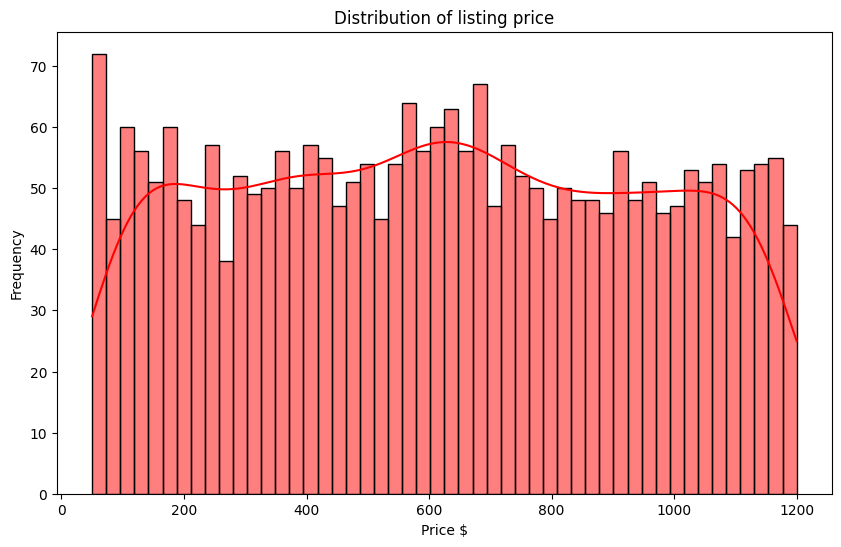

In [19]:
plt.figure(figsize = (10,6))
sns.histplot(df['price'],bins=50,kde = True,color = 'red')
plt.title("Distribution of listing price")
plt.xlabel("Price $")
plt.ylabel("Frequency")
plt.show()

In [20]:
This histogram shows a fairly even distribution of
listing prices across different price ranges, indicating no
particular concentration of listings in any specific price range.
The KDE line helps visualize this even spread more clearly,
confirming that the dataset contains listings with a wide variety of prices.

SyntaxError: invalid syntax (3278178025.py, line 1)

How are different room types distributed?

In [21]:
df['room type']

0          Private room
1       Entire home/apt
2          Private room
4       Entire home/apt
5       Entire home/apt
             ...       
2690    Entire home/apt
2691       Private room
2692    Entire home/apt
2693       Private room
2694                NaN
Name: room type, Length: 2626, dtype: object

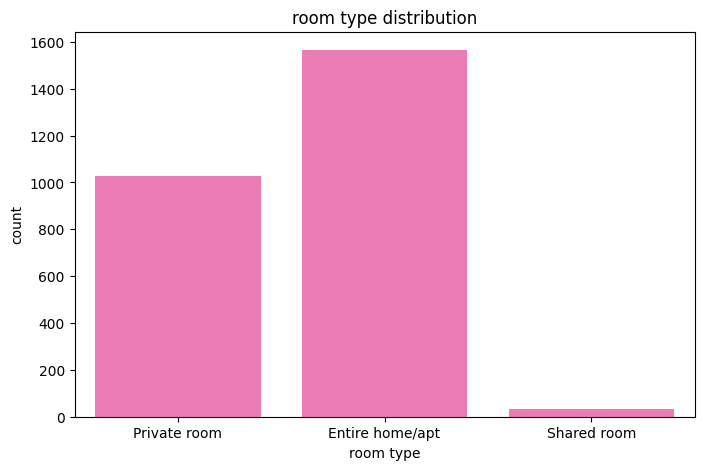

In [22]:
plt.figure(figsize = (8,5))
sns.countplot( x= "room type", data = df, color = "hotpink")
plt.title("room type distribution")
plt.xlabel("room type")
plt.ylabel("count")
plt.show()

How are listings distributed across different neighbourhoods?

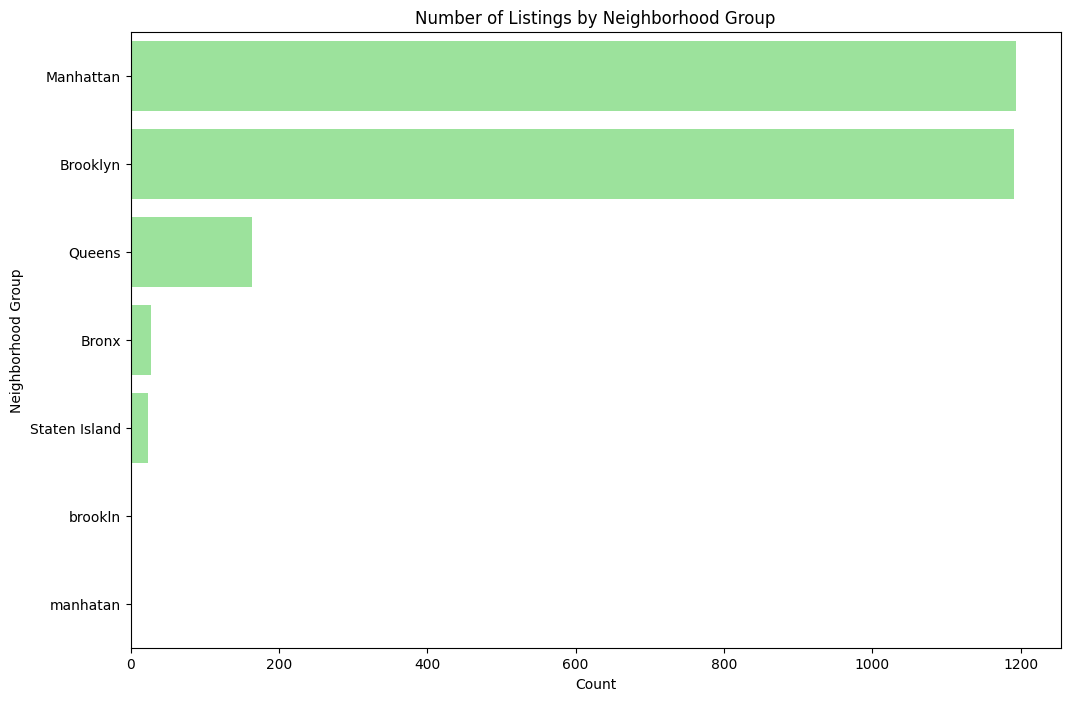

In [23]:
plt.figure(figsize = (12,8))
sns.countplot(y = 'neighbourhood group' , data=df,color="lightgreen" , order=df['neighbourhood group'].value_counts().index)
plt.title('Number of Listings by Neighborhood Group')
plt.xlabel('Count')
plt.ylabel('Neighborhood Group')
plt.show()

What is the relationship between price and room type?

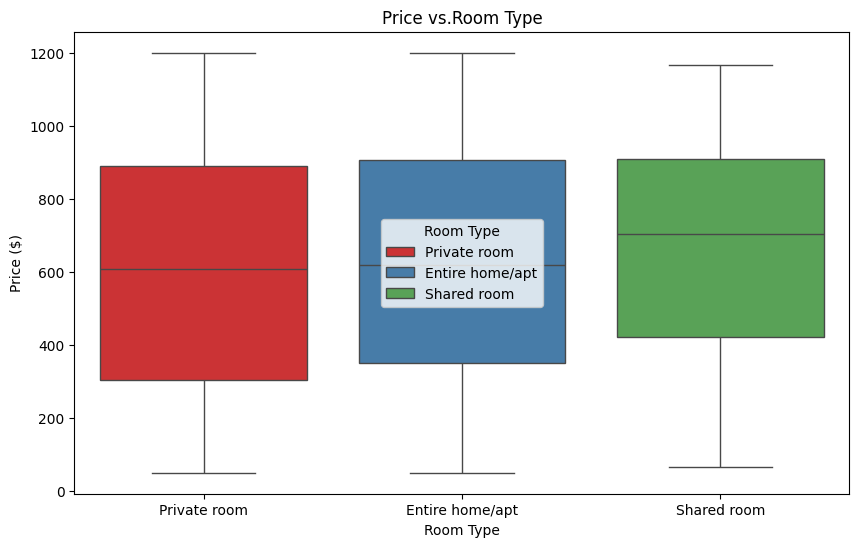

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room type', y='price', hue='room type', data=df, palette='Set1')
plt.title('Price vs.Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.legend(title='Room Type')
plt.show()




How has the number of reviews change over with time?

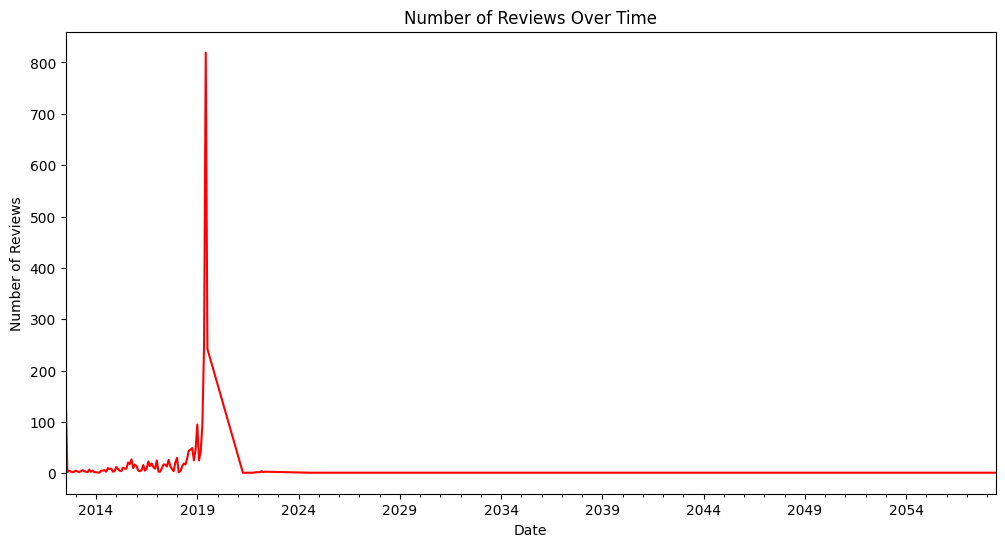

In [39]:
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(12,6))
reviews_over_time.plot(kind='line',color='red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()